## Import Libraries

In [112]:
import gdal
import geopandas as gpd
import pandas as pd 
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio
from rasterio.plot import show

## Plotting Settings

In [86]:
%matplotlib inline

In [90]:
dpi = 200
mpl.rcParams['figure.dpi']= dpi

## Read Data

In [7]:
gdf = pd.read_pickle('gdf')

In [5]:
gdf.head()

,3band,8band,geojson,image_number,geoshape
0,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,12,"(5, 19)"
1,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,30,"(2, 19)"
2,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,44,"(1, 19)"
3,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,46,"(11, 19)"
4,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,/home/ahm/Datascience/Satellite Imagery Detect...,47,"(15, 19)"


In [17]:
path = str(gdf['8band'][0])
raster = gdal.Open(path)

## Print Basic Raster Info

In [ ]:
print(raster.RasterXSize,raster.RasterYSize)

In [33]:
raster.GetProjection().split('],')

['GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]',
 'AUTHORITY["EPSG","6326"]',
 'PRIMEM["Greenwich",0',
 'UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]',
 'AXIS["Latitude",NORTH',
 'AXIS["Longitude",EAST',
 'AUTHORITY["EPSG","4326"]]']

In [39]:
top_left_x,x_resolution,_,top_left_y,__,y_resolution = raster.GetGeoTransform()

In [42]:
print('top left x coordinate: ', top_left_x)
print()
print('x resolution or cell width in the x direction: ', x_resolution)
print()
print('top left y coordinate: ', top_left_y)
print()
print('y resolution or cell width in the y direction: ', y_resolution)


top left x coordinate:  -43.7732462563

x resolution or cell width in the x direction:  1.7875319090876474e-05

top left y coordinate:  -22.9214851954

y resolution or cell width in the y direction:  -1.803334455447167e-05


In [43]:
print('Number of Raster Bands: ', raster.RasterCount)

Number of Raster Bands:  8


## Print Raster Band Info

In [53]:
band1 = raster.GetRasterBand(1)

In [54]:
print('Band 1 No Data Value: ',band1.GetNoDataValue())

Band 1 No Data Value:  None


In [55]:
print('Band 1 Minimum Value:',band1.GetMinimum())

Band 1 Minimum Value: None


In [56]:
print('Band 1 Maximum Value:',band1.GetMaximum())


Band 1 Maximum Value: None


In [58]:
print('Band 1 Data Type:',band1.GetUnitType())

Band 1 Data Type: 


## Read Band as Numpy Array

In [68]:
band1 = band1.ReadAsArray()

In [69]:
band1.shape

(101, 110)

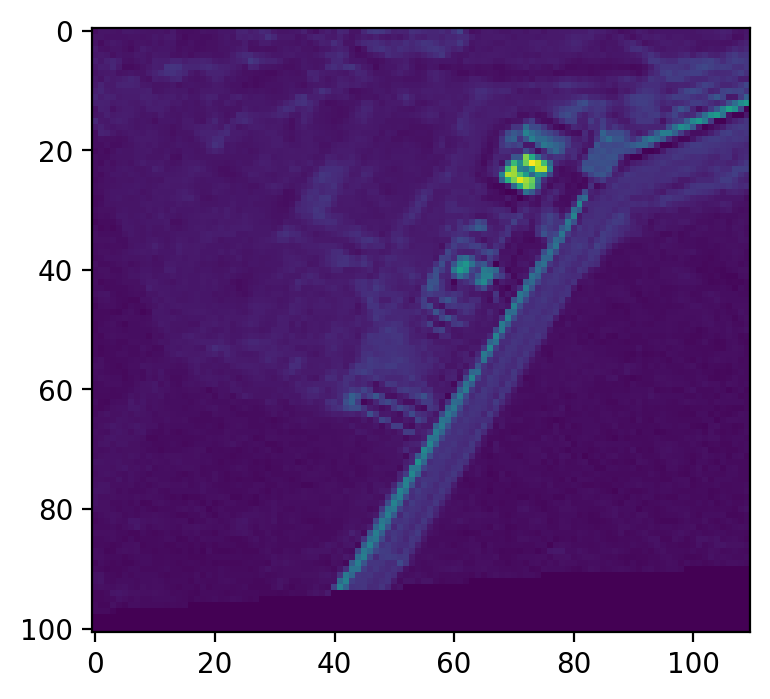

In [91]:
plt.imshow(band1);

## Compare Raster Image with Corresponding GeoJSON Vector

In [94]:
g_path = gdf['geojson'][0]

In [99]:
g = gpd.read_file(g_path)

In [100]:
g

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,QAStatus,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry
0,2016-06-22T21:31:07+00:00,1,5404,Derick,43,1177981.0,yes,None,way/78096,None,Modified_Original_Rev1,1177981.0,West,Yes,0.000194,0.0,0.0,1.0,"POLYGON Z ((-43.77204 -22.92223 0.00000, -43.7..."
1,2016-06-22T21:40:10+00:00,1,5404,Derick,43,15688.0,yes,None,way/86252,None,Modified_Original_Rev1,15688.0,West,Yes,0.000383,0.0,0.0,1.0,"POLYGON Z ((-43.77190 -22.92195 0.00000, -43.7..."
2,2016-06-22T22:01:06+00:00,1,5405,Derick,43,1177983.0,yes,None,way/103746,None,Modified_Original_Rev1,1177983.0,West,Yes,0.000212,0.0,0.0,1.0,"POLYGON Z ((-43.77210 -22.92220 0.00000, -43.7..."
3,2016-06-22T22:13:46+00:00,1,5405,Derick,43,1177993.0,yes,None,way/113992,None,Modified_Original_Rev1,1177993.0,West,Yes,0.000286,0.0,0.0,1.0,"POLYGON Z ((-43.77186 -22.92189 0.00000, -43.7..."
4,2016-06-22T22:28:09+00:00,1,5405,Derick,43,15689.0,yes,None,way/124541,None,Modified_Original_Rev1,15689.0,West,Yes,0.000454,0.0,0.0,1.0,"POLYGON Z ((-43.77164 -22.92184 0.00000, -43.7..."


### You can plot the polygons and color them depending on attribute of the geodataframe

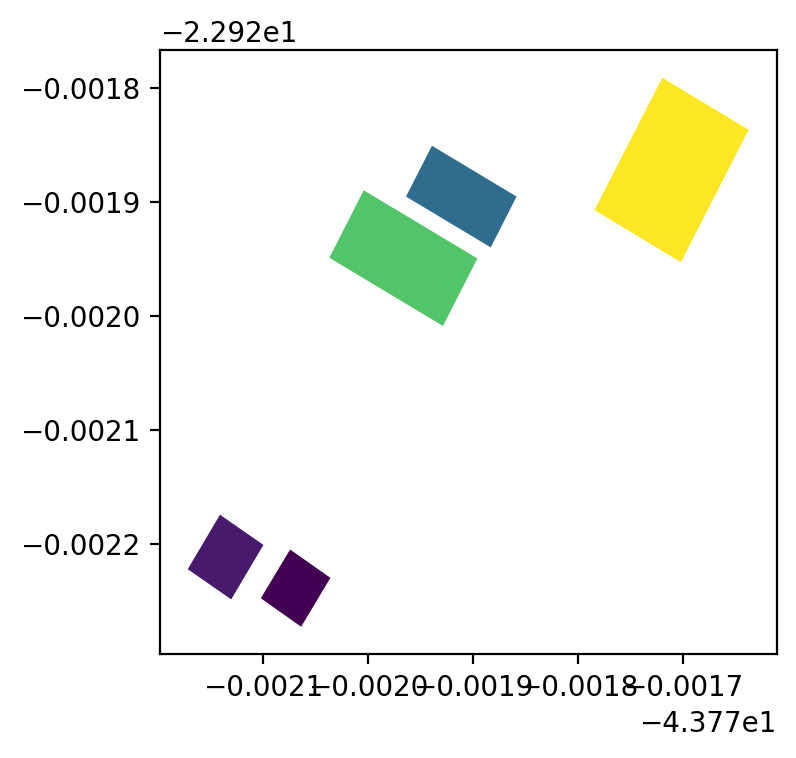

In [101]:
g.plot(column='Shape_Leng');


## Opening and plotting raster with rasterio

In [110]:
r = rasterio.open(path)

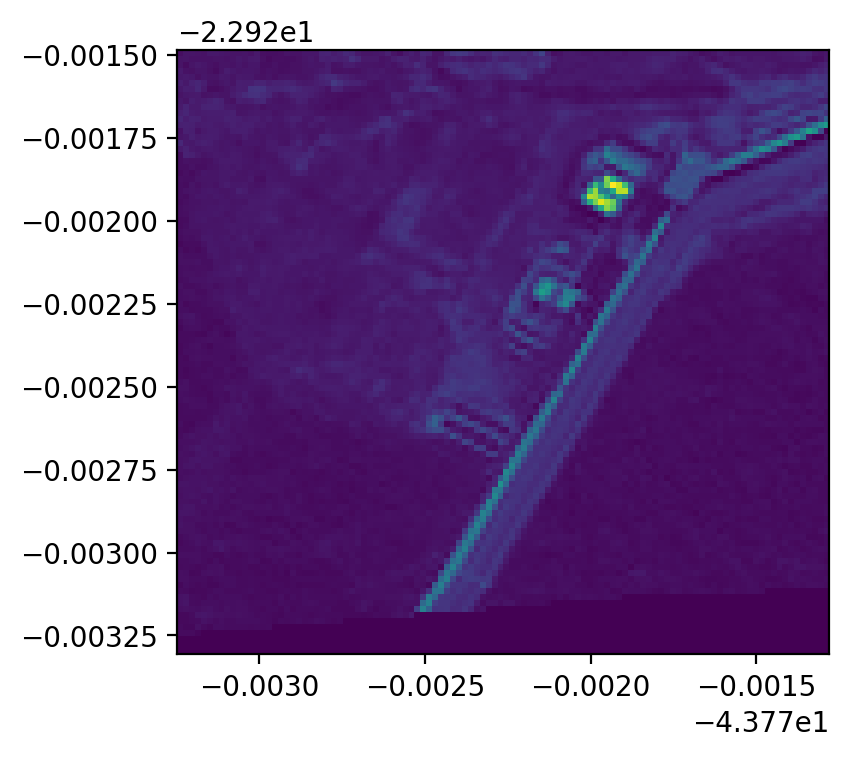

In [115]:
show(r);

## Get the Number of Bands in the Raster File

In [117]:
r.count

8

In [119]:
r.width

110

In [120]:
r.height

101

In [121]:
r.bounds

BoundingBox(left=-43.7732462563, bottom=-22.9233065632, right=-43.7712799712, top=-22.9214851954)

In [122]:
r.crs

CRS.from_epsg(4326)

('uint16',
 'uint16',
 'uint16',
 'uint16',
 'uint16',
 'uint16',
 'uint16',
 'uint16')

### Equivelant to GDAL GeoTransform

In [127]:
r.transform

Affine(1.7875319090876474e-05, 0.0, -43.7732462563,
       0.0, -1.803334455447167e-05, -22.9214851954)

## Attributes of a rasterio DatasetReader


    driver: the name of the desired format driver

    width: the number of columns of the dataset

    height: the number of rows of the dataset

    count: a count of the dataset bands

    dtype: the data type of the dataset

    crs: a coordinate reference system identifier or description

    transform: an affine transformation matrix, and

    nodata: a “nodata” value


## Overlaying Polygon ontop of raster file

### You can get the current axis in matplotlib using mpl.pyplot.gca